Creates a Exploratory Data Analysis of the output file using RyR Generator

In [9]:
#% pip install openpyxl
import pandas as pd
import sqlite3
import sys
import matplotlib.pyplot as plt
sys.path.append("../tools/")
import _db_tools as db

#Helper functions
def prepare_data(target):
    data = pd.read_excel(target) #Import the RyR generator
    df = data.iloc[2:, 1:-2] #Slices the measures
    df.reset_index(drop=True, inplace=True) #Reset rows index
    df.columns = range(df.shape[1]) #Reset columns index
    dbh.store_df(df, "measures") #Store the dataframe in the connected database
    dbh.consult_tables() #Checks results

def plot_scatter(df, guide=None, title=None, xlabel=None, ylabel=None, legend_label=None):
    """Plots a dataframe into a scatter plot using one of the dimensions of the colous measurement. 
    Optionally filters the plot by guide colour axis"""
    i = 0  # Counter used for the fiber number in the legend
    if guide == 'x':  # Guide selector (filter) using strings
        for index, row in df.iterrows():
            if index % 2 != 0:
                i += 1
                plt.scatter(
                    list(element + 1 for element in list(range(df.shape[1]))),
                    df.iloc[index],
                    label=legend_label + f'{i}' if legend_label else None,
                )
    elif guide == 'y':
        for index, row in df.iterrows():
            if index % 2 == 0:
                i += 1
                plt.scatter(
                    list(element + 1 for element in list(range(df.shape[1]))),
                    df.iloc[index],
                    label=legend_label + f'{i}' if legend_label else None,
                )
    elif guide == None: # Plots all fibers
        for index, row in df.iterrows():
            plt.scatter(
                list(element + 1 for element in list(range(df.shape[1]))),
                df.iloc[index],
                label=legend_label + f'{i}' if legend_label else None,
            )
    plt.title(title) if title else None
    plt.xlabel(xlabel) if xlabel else None
    plt.ylabel(ylabel) if ylabel else None
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') if legend_label else None
    plt.show()

../database/database.db found.
Dataframe stored as measures
../database/database.db actual contents:
    measures
Table measures retrieved succesfully.


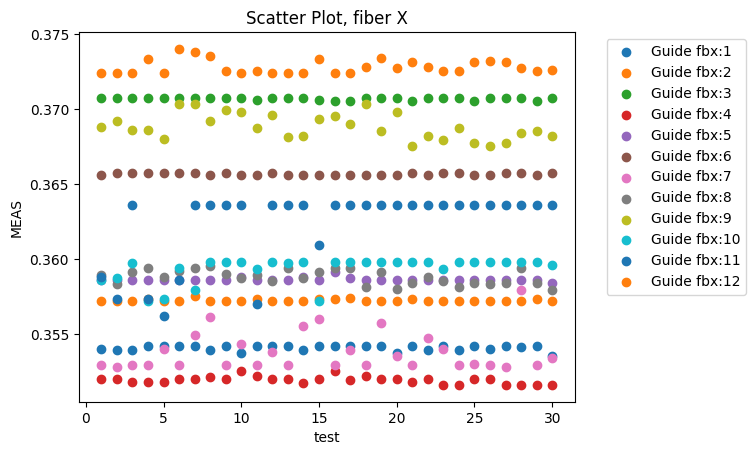

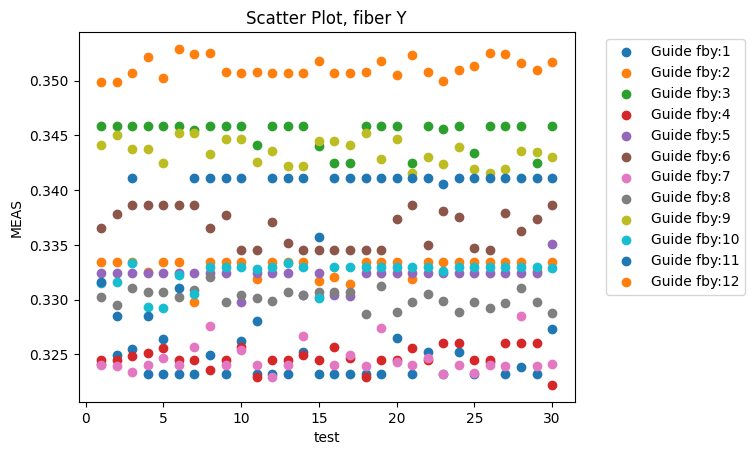

In [10]:
dbh = db.SQLite_Data_Extractor("database.db")
prepare_data("../data/target.xlsx")
df = dbh.retrieve("measures")
plot_scatter(df, 'x', 'Scatter Plot, fiber X', 'test', 'MEAS', 'Guide fbx:')
plot_scatter(df, 'y', 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Guide fby:')